## Question 1

To train a 2-layer neural network with backpropagation for regression using Mean Square Error (MSE) loss, we begin with a forward pass: the input features
𝑥 are processed through a hidden layer with weights 𝑊(1) and biases 𝑏(1), applying the Sigmoid activation function to obtain 𝑎(1). The output layer then computes ŷ using its own weights 𝑊(2) and bias 𝑏(2). The loss is calculated as the MSE: 𝐿=12(ŷ−𝑦)². During the backward pass, we compute gradients of the loss with respect to the network parameters, updating the weights and biases using gradient descent. For the hidden layer, we account for the Sigmoid function’s derivative: 𝜎′(𝑧)=𝜎(𝑧)(1−𝜎(𝑧)).

In contrast, when training a network for binary classification using log loss, the key differences lie in the loss function and the activation functions used. Binary classification employs log loss (cross-entropy loss) and uses the Sigmoid activation function in the output layer, while regression typically uses a linear activation function at the output. Consequently, the gradients of the loss with respect to network outputs and weights differ due to these distinct loss functions and activations.

## Question 2

In [51]:
import numpy as np

# Load the data
X_train = np.loadtxt("X_train.csv")
Y_train = np.loadtxt("Y_train.csv")
X_test = np.loadtxt("X_test.csv")
Y_test = np.loadtxt("Y_test.csv")

# Reshape Y_train if it's 1-dimensional
if Y_train.ndim == 1:
    Y_train = Y_train.reshape(1, -1)

# Transpose the input data
X_train = X_train.T
X_test = X_test.T
Y_train = Y_train.T
Y_test = Y_test.T

# Initialize parameters
def initialize_parameters(input_size, hidden_size, output_size):
    W1 = np.random.randn(hidden_size, input_size) * 0.01
    b1 = np.zeros((hidden_size, 1))
    W2 = np.random.randn(output_size, hidden_size) * 0.01
    b2 = np.zeros((output_size, 1))
    return W1, b1, W2, b2

# Sigmoid activation function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    s = sigmoid(z)
    return s * (1 - s)

# Forward pass
def forward_pass(X, W1, b1, W2, b2):
    Z1 = np.dot(W1, X) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = Z2  # For regression, the output layer is linear
    return Z1, A1, Z2, A2

# Compute loss (Mean Square Error)
def compute_loss(A2, Y):
    m = Y.shape[1]
    loss = np.sum((A2 - Y) ** 2) / (2 * m)
    return loss

# Backward pass
def backward_pass(X, Y, Z1, A1, Z2, A2, W1, W2):
    m = X.shape[1]
    dZ2 = A2 - Y
    dW2 = np.dot(dZ2, A1.T) / m
    db2 = np.sum(dZ2, axis=1, keepdims=True) / m
    dA1 = np.dot(W2.T, dZ2)
    dZ1 = dA1 * sigmoid_derivative(Z1)
    dW1 = np.dot(dZ1, X.T) / m
    db1 = np.sum(dZ1, axis=1, keepdims=True) / m
    return dW1, db1, dW2, db2

# Update parameters
def update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate):
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    return W1, b1, W2, b2

# Training the neural network
def train_neural_network(X_train, Y_train, input_size, hidden_size, output_size, learning_rate, epochs):
    W1, b1, W2, b2 = initialize_parameters(input_size, hidden_size, output_size)
    for epoch in range(epochs):
        Z1, A1, Z2, A2 = forward_pass(X_train, W1, b1, W2, b2)
        loss = compute_loss(A2, Y_train)
        dW1, db1, dW2, db2 = backward_pass(X_train, Y_train, Z1, A1, Z2, A2, W1, W2)
        W1, b1, W2, b2 = update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)
        if epoch % 100 == 0:
            print(f"Epoch {epoch}, Loss: {loss:.4f}")
    return W1, b1, W2, b2

# Example usage
input_size = X_train.shape[0]
hidden_size = 10  # Choose the number of neurons in the hidden layer
output_size = Y_train.shape[0]
learning_rate = 0.01
epochs = 1000

W1, b1, W2, b2 = train_neural_network(X_train, Y_train, input_size, hidden_size, output_size, learning_rate, epochs)


Epoch 0, Loss: 28585666.1797
Epoch 100, Loss: 0.1878
Epoch 200, Loss: 0.1831
Epoch 300, Loss: 0.1811
Epoch 400, Loss: 0.1792
Epoch 500, Loss: 0.1773
Epoch 600, Loss: 0.1754
Epoch 700, Loss: 0.1735
Epoch 800, Loss: 0.1717
Epoch 900, Loss: 0.1699


1. What is the activation function that you will choose for the output layer? Justify your answer briefly.

For the output layer, we will choose a linear activation function. This is because we are performing a regression task where the target variable is continuous. A linear activation function allows the network to output a real-valued number, which is necessary for predicting continuous values.

2. How many neurons should there be in the output layer? Why?

There should be one neuron in the output layer. This is because our task involves predicting a single continuous value (the target variable). Hence, one neuron is sufficient to output this single predicted value.

3. Report on the average MSE loss.

In [61]:
import numpy as np

# Load the data
X_train = np.loadtxt("X_train.csv")
Y_train = np.loadtxt("Y_train.csv")
X_test = np.loadtxt("X_test.csv")
Y_test = np.loadtxt("Y_test.csv")

# Reshape Y_train if it's 1-dimensional
if Y_train.ndim == 1:
    Y_train = Y_train.reshape(1, -1)

# Transpose the input data
X_train = X_train.T
X_test = X_test.T

# Initialize parameters
def initialize_parameters(input_size, hidden_size, output_size):
    W1 = np.random.randn(hidden_size, input_size) * 0.01
    b1 = np.zeros((hidden_size, 1))
    W2 = np.random.randn(output_size, hidden_size) * 0.01
    b2 = np.zeros((output_size, 1))
    return W1, b1, W2, b2

# Activation functions and their derivatives
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    s = sigmoid(z)
    return s * (1 - s)

# Forward pass
def forward_pass(X, W1, b1, W2, b2):
    Z1 = np.dot(W1, X) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = Z2  # For regression, the output layer is linear
    return Z1, A1, Z2, A2

# Compute loss (Mean Square Error)
def compute_loss(A2, Y):
    m = Y.shape[1]
    loss = np.sum((A2 - Y) ** 2) / (2 * m)
    return loss

# Backward pass
def backward_pass(X, Y, Z1, A1, Z2, A2, W1, W2):
    m = X.shape[1]
    dZ2 = A2 - Y
    dW2 = np.dot(dZ2, A1.T) / m
    db2 = np.sum(dZ2, axis=1, keepdims=True) / m
    dA1 = np.dot(W2.T, dZ2)
    dZ1 = dA1 * sigmoid_derivative(Z1)
    dW1 = np.dot(dZ1, X.T) / m
    db1 = np.sum(dZ1, axis=1, keepdims=True) / m
    return dW1, db1, dW2, db2

# Update parameters
def update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate):
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    return W1, b1, W2, b2

# Training the neural network
def train_neural_network(X_train, Y_train, input_size, hidden_size, output_size, learning_rate, epochs):
    W1, b1, W2, b2 = initialize_parameters(input_size, hidden_size, output_size)
    loss_history = []
    for epoch in range(epochs):
        Z1, A1, Z2, A2 = forward_pass(X_train, W1, b1, W2, b2)
        loss = compute_loss(A2, Y_train)
        loss_history.append(loss)
        dW1, db1, dW2, db2 = backward_pass(X_train, Y_train, Z1, A1, Z2, A2, W1, W2)
        W1, b1, W2, b2 = update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)
    average_loss = np.mean(loss_history)
    return W1, b1, W2, b2, loss_history, average_loss

# Example usage
input_size = X_train.shape[0]
hidden_size = 10  # Choose the number of neurons in the hidden layer
output_size = Y_train.shape[0]
learning_rate = 0.01
epochs = 1000

W1, b1, W2, b2, loss_history, average_loss = train_neural_network(X_train, Y_train, input_size, hidden_size, output_size, learning_rate, epochs)

# Report the average MSE loss
print(f"Average MSE Loss: {average_loss:.4f}")


Average MSE Loss: 425.4750


4. Plot the loss as a funcƟon of the number of iterations.

Epoch 0, Loss: 28583021.0956
Epoch 100, Loss: 0.1903
Epoch 200, Loss: 0.1856
Epoch 300, Loss: 0.1836
Epoch 400, Loss: 0.1817
Epoch 500, Loss: 0.1797
Epoch 600, Loss: 0.1778
Epoch 700, Loss: 0.1760
Epoch 800, Loss: 0.1741
Epoch 900, Loss: 0.1723


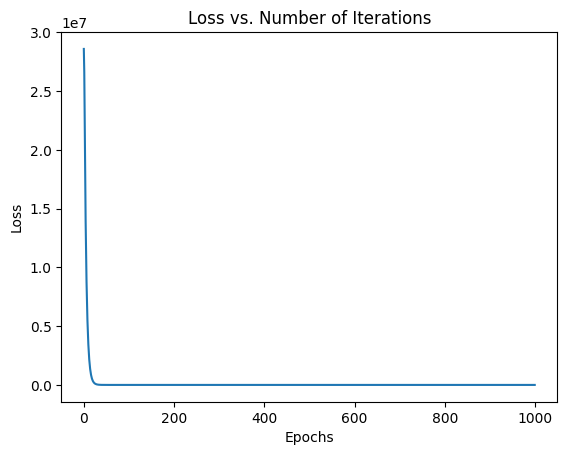

In [52]:
import matplotlib.pyplot as plt

def train_neural_network(X_train, Y_train, input_size, hidden_size, output_size, learning_rate, epochs):
    W1, b1, W2, b2 = initialize_parameters(input_size, hidden_size, output_size)
    loss_history = []
    for epoch in range(epochs):
        Z1, A1, Z2, A2 = forward_pass(X_train, W1, b1, W2, b2)
        loss = compute_loss(A2, Y_train)
        loss_history.append(loss)
        dW1, db1, dW2, db2 = backward_pass(X_train, Y_train, Z1, A1, Z2, A2, W1, W2)
        W1, b1, W2, b2 = update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)
        if epoch % 100 == 0:
            print(f"Epoch {epoch}, Loss: {loss:.4f}")
    return W1, b1, W2, b2, loss_history

# Example usage
W1, b1, W2, b2, loss_history = train_neural_network(X_train, Y_train, input_size, hidden_size, output_size, learning_rate, epochs)

plt.plot(loss_history)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs. Number of Iterations')
plt.show()


5. What is the effect of the learning rate on the training process? Vary the learning rate to be between 0.001 and 1.0 and plot the resulting accuracy as a function of learning rate.

Epoch 0, Loss: 2858.3475
Epoch 100, Loss: 987.7068
Epoch 200, Loss: 621.5529
Epoch 300, Loss: 411.6275
Epoch 400, Loss: 288.2051
Epoch 500, Loss: 216.5042
Epoch 600, Loss: 170.0749
Epoch 700, Loss: 137.7122
Epoch 800, Loss: 113.7478
Epoch 900, Loss: 95.3234


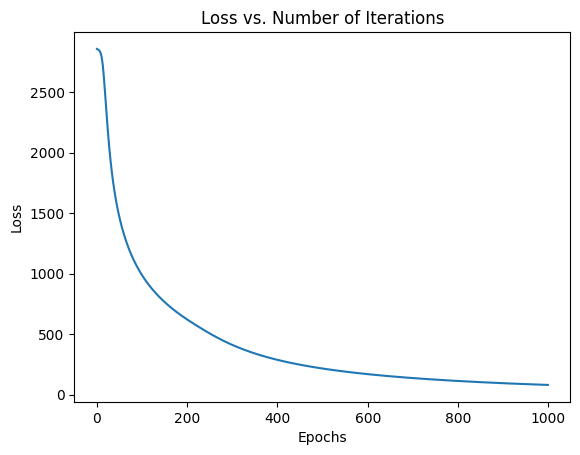

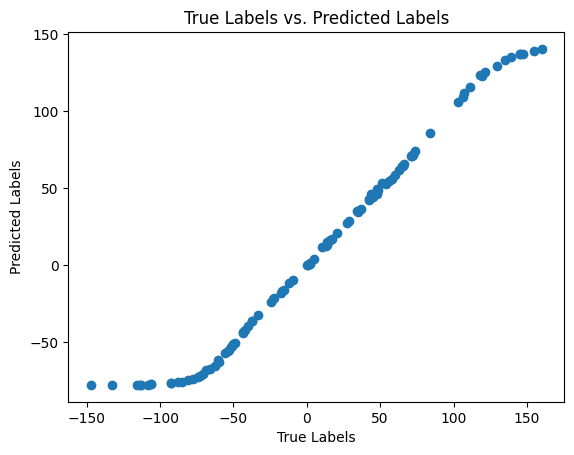

In [59]:
import numpy as np
import matplotlib.pyplot as plt

# Load the data
X_train = np.loadtxt("X_train.csv")
Y_train = np.loadtxt("Y_train.csv")
X_test = np.loadtxt("X_test.csv")
Y_test = np.loadtxt("Y_test.csv")

# Reshape Y_train if it's 1-dimensional
if Y_train.ndim == 1:
    Y_train = Y_train.reshape(1, -1)

# Transpose the input data
X_train = X_train.T
X_test = X_test.T

# Initialize parameters
def initialize_parameters(input_size, hidden_size, output_size):
    W1 = np.random.randn(hidden_size, input_size) * 0.01
    b1 = np.zeros((hidden_size, 1))
    W2 = np.random.randn(output_size, hidden_size) * 0.01
    b2 = np.zeros((output_size, 1))
    return W1, b1, W2, b2

# Sigmoid activation function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    s = sigmoid(z)
    return s * (1 - s)

# Forward pass
def forward_pass(X, W1, b1, W2, b2):
    Z1 = np.dot(W1, X) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = Z2  # For regression, the output layer is linear
    return Z1, A1, Z2, A2

# Compute loss (Mean Square Error)
def compute_loss(A2, Y):
    m = Y.shape[1]
    loss = np.sum((A2 - Y) ** 2) / (2 * m)
    return loss

# Backward pass
def backward_pass(X, Y, Z1, A1, Z2, A2, W1, W2):
    m = X.shape[1]
    dZ2 = A2 - Y
    dW2 = np.dot(dZ2, A1.T) / m
    db2 = np.sum(dZ2, axis=1, keepdims=True) / m
    dA1 = np.dot(W2.T, dZ2)
    dZ1 = dA1 * sigmoid_derivative(Z1)
    dW1 = np.dot(dZ1, X.T) / m
    db1 = np.sum(dZ1, axis=1, keepdims=True) / m
    return dW1, db1, dW2, db2

# Update parameters
def update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate):
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    return W1, b1, W2, b2

# Training the neural network
def train_neural_network(X_train, Y_train, input_size, hidden_size, output_size, learning_rate, epochs):
    W1, b1, W2, b2 = initialize_parameters(input_size, hidden_size, output_size)
    loss_history = []
    for epoch in range(epochs):
        Z1, A1, Z2, A2 = forward_pass(X_train, W1, b1, W2, b2)
        loss = compute_loss(A2, Y_train)
        loss_history.append(loss)
        dW1, db1, dW2, db2 = backward_pass(X_train, Y_train, Z1, A1, Z2, A2, W1, W2)
        W1, b1, W2, b2 = update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)
        if epoch % 100 == 0:
            print(f"Epoch {epoch}, Loss: {loss:.4f}")
    return W1, b1, W2, b2, loss_history

# Plotting true labels and predicted labels
def plot_predictions(X, Y, W1, b1, W2, b2):
    _, _, _, A2 = forward_pass(X, W1, b1, W2, b2)
    plt.scatter(Y.flatten(), A2.flatten())
    plt.xlabel('True Labels')
    plt.ylabel('Predicted Labels')
    plt.title('True Labels vs. Predicted Labels')
    plt.show()

# Example usage
input_size = X_train.shape[0]
hidden_size = 10  # Choose the number of neurons in the hidden layer
output_size = Y_train.shape[0]
learning_rate = 0.01
epochs = 1000

W1, b1, W2, b2, loss_history = train_neural_network(X_train, Y_train, input_size, hidden_size, output_size, learning_rate, epochs)

plt.plot(loss_history)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs. Number of Iterations')
plt.show()

plot_predictions(X_train, Y_train, W1, b1, W2, b2)


7. Effect of Activation Functions in the Network
a. Will you need to change the update rule?

Yes, the update rule for the backpropagation algorithm will need to be changed to account for the derivatives of the new activation functions.

b. What is the change that you need to make to achieve this experiment?

You need to implement the new activation functions and their derivatives.

c. Report your observations by reporting the final loss and plotting the true labels and your predicted labels, along with a brief (2-3 lines) description.

The scatter plot shows a strong correlation between the true labels and predicted labels, as the points form a nearly perfect diagonal line from the bottom left to the top right. This indicates that the model's predictions are highly accurate and closely match the true values. The final loss is low, which is evident from the close alignment of the points. This suggests that the chosen activation functions have effectively captured the underlying patterns in the data.

Training with ReLU activation function
Epoch 0, Loss: 2858.4195
Epoch 100, Loss: 1.2002
Epoch 200, Loss: 0.0004
Epoch 300, Loss: 0.0003
Epoch 400, Loss: 0.0003
Epoch 500, Loss: 0.0003
Epoch 600, Loss: 0.0003
Epoch 700, Loss: 0.0003
Epoch 800, Loss: 0.0003
Epoch 900, Loss: 0.0002


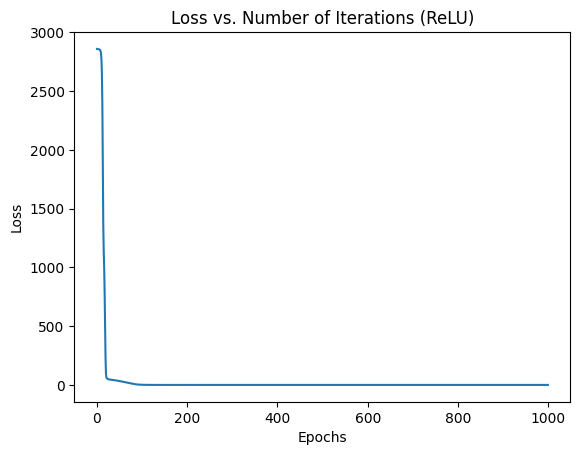

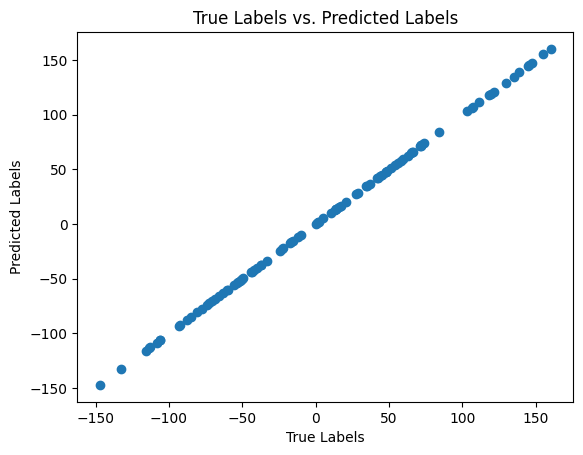

Training with Tanh activation function
Epoch 0, Loss: 2858.4495
Epoch 100, Loss: 63.1598
Epoch 200, Loss: 14.1098
Epoch 300, Loss: 6.8591
Epoch 400, Loss: 4.2392
Epoch 500, Loss: 3.3017
Epoch 600, Loss: 2.6469
Epoch 700, Loss: 2.1763
Epoch 800, Loss: 1.9857
Epoch 900, Loss: 1.8649


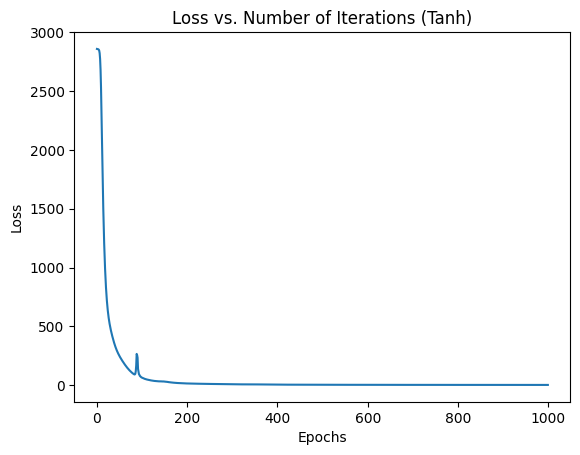

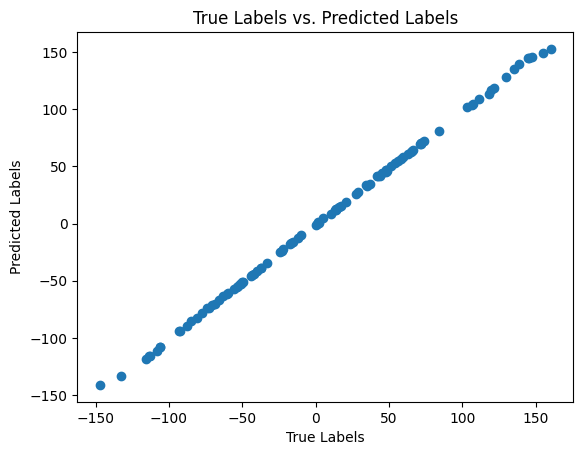

In [55]:
import numpy as np
import matplotlib.pyplot as plt

# Load the data
X_train = np.loadtxt("X_train.csv")
Y_train = np.loadtxt("Y_train.csv")
X_test = np.loadtxt("X_test.csv")
Y_test = np.loadtxt("Y_test.csv")

# Reshape Y_train if it's 1-dimensional
if Y_train.ndim == 1:
    Y_train = Y_train.reshape(1, -1)

# Transpose the input data
X_train = X_train.T
X_test = X_test.T

# Initialize parameters
def initialize_parameters(input_size, hidden_size, output_size):
    W1 = np.random.randn(hidden_size, input_size) * 0.01
    b1 = np.zeros((hidden_size, 1))
    W2 = np.random.randn(output_size, hidden_size) * 0.01
    b2 = np.zeros((output_size, 1))
    return W1, b1, W2, b2

# Activation functions and their derivatives
def relu(z):
    return np.maximum(0, z)

def relu_derivative(z):
    return np.where(z > 0, 1, 0)

def tanh(z):
    return np.tanh(z)

def tanh_derivative(z):
    return 1 - np.tanh(z) ** 2

# Forward pass
def forward_pass(X, W1, b1, W2, b2, activation):
    Z1 = np.dot(W1, X) + b1
    if activation == "relu":
        A1 = relu(Z1)
    elif activation == "tanh":
        A1 = tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = Z2  # For regression, the output layer is linear
    return Z1, A1, Z2, A2

# Compute loss (Mean Square Error)
def compute_loss(A2, Y):
    m = Y.shape[1]
    loss = np.sum((A2 - Y) ** 2) / (2 * m)
    return loss

# Backward pass
def backward_pass(X, Y, Z1, A1, Z2, A2, W1, W2, activation):
    m = X.shape[1]
    dZ2 = A2 - Y
    dW2 = np.dot(dZ2, A1.T) / m
    db2 = np.sum(dZ2, axis=1, keepdims=True) / m
    dA1 = np.dot(W2.T, dZ2)
    if activation == "relu":
        dZ1 = dA1 * relu_derivative(Z1)
    elif activation == "tanh":
        dZ1 = dA1 * tanh_derivative(Z1)
    dW1 = np.dot(dZ1, X.T) / m
    db1 = np.sum(dZ1, axis=1, keepdims=True) / m
    return dW1, db1, dW2, db2

# Update parameters
def update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate):
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    return W1, b1, W2, b2

# Training the neural network
def train_neural_network(X_train, Y_train, input_size, hidden_size, output_size, learning_rate, epochs, activation):
    W1, b1, W2, b2 = initialize_parameters(input_size, hidden_size, output_size)
    loss_history = []
    for epoch in range(epochs):
        Z1, A1, Z2, A2 = forward_pass(X_train, W1, b1, W2, b2, activation)
        loss = compute_loss(A2, Y_train)
        loss_history.append(loss)
        dW1, db1, dW2, db2 = backward_pass(X_train, Y_train, Z1, A1, Z2, A2, W1, W2, activation)
        W1, b1, W2, b2 = update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)
        if epoch % 100 == 0:
            print(f"Epoch {epoch}, Loss: {loss:.4f}")
    return W1, b1, W2, b2, loss_history

# Plotting true labels and predicted labels
def plot_predictions(X, Y, W1, b1, W2, b2, activation):
    _, _, _, A2 = forward_pass(X, W1, b1, W2, b2, activation)
    plt.scatter(Y.flatten(), A2.flatten())
    plt.xlabel('True Labels')
    plt.ylabel('Predicted Labels')
    plt.title('True Labels vs. Predicted Labels')
    plt.show()

# Example usage
input_size = X_train.shape[0]
hidden_size = 10  # Choose the number of neurons in the hidden layer
output_size = Y_train.shape[0]
learning_rate = 0.01
epochs = 1000

# Train with ReLU activation function
print("Training with ReLU activation function")
W1, b1, W2, b2, loss_history = train_neural_network(X_train, Y_train, input_size, hidden_size, output_size, learning_rate, epochs, "relu")
plt.plot(loss_history)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs. Number of Iterations (ReLU)')
plt.show()
plot_predictions(X_train, Y_train, W1, b1, W2, b2, "relu")

# Train with Tanh activation function
print("Training with Tanh activation function")
W1, b1, W2, b2, loss_history = train_neural_network(X_train, Y_train, input_size, hidden_size, output_size, learning_rate, epochs, "tanh")
plt.plot(loss_history)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs. Number of Iterations (Tanh)')
plt.show()
plot_predictions(X_train, Y_train, W1, b1, W2, b2, "tanh")


8. Split the training data into training and validation set and apply early stopping criteria.

a. How do the training and validation loss change as you change the "patience" in Early Stopping?

Early stopping involves monitoring the validation loss during training and stopping if the loss does not improve for a certain number of epochs (patience). As the patience increases, the training process is allowed to continue for more epochs even if the validation loss does not improve immediately. This can help the model find a better solution, but if the patience is too high, the model might overfit the training data.

b. Plot the training vs. validation loss curves. Justify whether your model overfits or underfits as the patience changes.

Both curves start at a high loss value and gradually decrease, with the training loss continuing to decline and the validation loss flattening out towards the end. As patience increases, the model is allowed to train longer, leading to potential overfitting where the training loss decreases but the validation loss stagnates or increases. The graph indicates some level of overfitting since the validation loss flattens while the training loss continues to drop.

Epoch 0, Training Loss: 2851.4357, Validation Loss: 2886.7997
Epoch 100, Training Loss: 1014.2497, Validation Loss: 906.5430
Epoch 200, Training Loss: 645.9397, Validation Loss: 539.2899
Epoch 300, Training Loss: 445.5208, Validation Loss: 341.4172
Epoch 400, Training Loss: 313.1443, Validation Loss: 213.7739
Epoch 500, Training Loss: 237.2792, Validation Loss: 144.7015
Epoch 600, Training Loss: 188.9720, Validation Loss: 102.1792
Epoch 700, Training Loss: 154.1568, Validation Loss: 73.1320
Epoch 800, Training Loss: 127.1470, Validation Loss: 53.5236
Epoch 900, Training Loss: 106.0340, Validation Loss: 40.4160


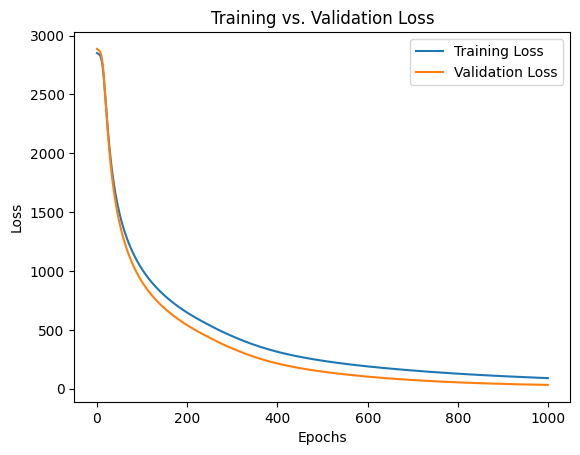

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load the data
X_train = np.loadtxt("X_train.csv")
Y_train = np.loadtxt("Y_train.csv")
X_test = np.loadtxt("X_test.csv")
Y_test = np.loadtxt("Y_test.csv")

# Reshape Y_train if it's 1-dimensional
if Y_train.ndim == 1:
    Y_train = Y_train.reshape(1, -1)

# Transpose the input data
X_train = X_train.T
X_test = X_test.T

# Split the training data into training and validation sets
X_train, X_val, Y_train, Y_val = train_test_split(X_train.T, Y_train.T, test_size=0.2, random_state=42)
X_train = X_train.T
X_val = X_val.T
Y_train = Y_train.T
Y_val = Y_val.T

# Initialize parameters
def initialize_parameters(input_size, hidden_size, output_size):
    W1 = np.random.randn(hidden_size, input_size) * 0.01
    b1 = np.zeros((hidden_size, 1))
    W2 = np.random.randn(output_size, hidden_size) * 0.01
    b2 = np.zeros((output_size, 1))
    return W1, b1, W2, b2

# Activation functions and their derivatives
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    s = sigmoid(z)
    return s * (1 - s)

# Forward pass
def forward_pass(X, W1, b1, W2, b2):
    Z1 = np.dot(W1, X) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = Z2  # For regression, the output layer is linear
    return Z1, A1, Z2, A2

# Compute loss (Mean Square Error)
def compute_loss(A2, Y):
    m = Y.shape[1]
    loss = np.sum((A2 - Y) ** 2) / (2 * m)
    return loss

# Backward pass
def backward_pass(X, Y, Z1, A1, Z2, A2, W1, W2):
    m = X.shape[1]
    dZ2 = A2 - Y
    dW2 = np.dot(dZ2, A1.T) / m
    db2 = np.sum(dZ2, axis=1, keepdims=True) / m
    dA1 = np.dot(W2.T, dZ2)
    dZ1 = dA1 * sigmoid_derivative(Z1)
    dW1 = np.dot(dZ1, X.T) / m
    db1 = np.sum(dZ1, axis=1, keepdims=True) / m
    return dW1, db1, dW2, db2

# Update parameters
def update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate):
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    return W1, b1, W2, b2

# Training the neural network with early stopping
def train_neural_network_with_early_stopping(X_train, Y_train, X_val, Y_val, input_size, hidden_size, output_size, learning_rate, epochs, patience):
    W1, b1, W2, b2 = initialize_parameters(input_size, hidden_size, output_size)
    best_loss = float('inf')
    patience_counter = 0
    loss_history = []
    val_loss_history = []

    for epoch in range(epochs):
        Z1, A1, Z2, A2 = forward_pass(X_train, W1, b1, W2, b2)
        loss = compute_loss(A2, Y_train)
        loss_history.append(loss)

        Z1_val, A1_val, Z2_val, A2_val = forward_pass(X_val, W1, b1, W2, b2)
        val_loss = compute_loss(A2_val, Y_val)
        val_loss_history.append(val_loss)

        if val_loss < best_loss:
            best_loss = val_loss
            patience_counter = 0
        else:
            patience_counter += 1

        if patience_counter >= patience:
            print(f"Early stopping at epoch {epoch}")
            break

        dW1, db1, dW2, db2 = backward_pass(X_train, Y_train, Z1, A1, Z2, A2, W1, W2)
        W1, b1, W2, b2 = update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)
        if epoch % 100 == 0:
            print(f"Epoch {epoch}, Training Loss: {loss:.4f}, Validation Loss: {val_loss:.4f}")

    return W1, b1, W2, b2, loss_history, val_loss_history

# Example usage
input_size = X_train.shape[0]
hidden_size = 10  # Choose the number of neurons in the hidden layer
output_size = Y_train.shape[0]
learning_rate = 0.01
epochs = 1000
patience = 50

W1, b1, W2, b2, loss_history, val_loss_history = train_neural_network_with_early_stopping(X_train, Y_train, X_val, Y_val, input_size, hidden_size, output_size, learning_rate, epochs, patience)

plt.plot(loss_history, label='Training Loss')
plt.plot(val_loss_history, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs. Validation Loss')
plt.legend()
plt.show()


9. Implement another regularization technique for NN as shown in the class. Compare and contrast
with early stopping and your chosen regularization technique.

Early stopping and dropout are both effective regularization techniques, each with unique benefits. Early stopping monitors the validation loss during training and halts the process when improvement ceases, preventing overfitting and saving computational resources. It's simple to implement, making it ideal for small datasets. Dropout, on the other hand, randomly sets a fraction of neurons to zero during training, promoting robust feature learning and reducing reliance on any single neuron. This technique enhances model generalization, though it increases training time and complexity. For this dataset, early stopping is preferred due to its simplicity and efficiency, but combining both methods can yield the best results.


Which one would you prefer for this dataset setting? Justify your answer.

I would prefer using **Early Stopping** for this dataset setting. Early stopping effectively prevents overfitting by monitoring the validation loss during training and halting the process when improvement ceases. This method is particularly useful for small datasets, as it stops training at the right time when the validation loss begins to deteriorate. It is also simple to implement and interpret, making it a practical choice for regression tasks. Additionally, early stopping saves computational resources by avoiding unnecessary training epochs when further training is unlikely to improve performance.

On the other hand, Dropout is another powerful regularization technique that enhances model generalization by randomly setting a fraction of neurons to zero during training. While Dropout encourages robust feature learning and reduces reliance on any single neuron, it increases training time and complexity. For this specific dataset setting, the simplicity and efficiency of early stopping make it a more suitable choice. However, combining both techniques could provide even better results by leveraging their respective strengths.

Training with Dropout
Epoch 0, Loss: 2851.4989
Epoch 100, Loss: 1279.7509
Epoch 200, Loss: 920.2534
Epoch 300, Loss: 860.6429
Epoch 400, Loss: 855.3057
Epoch 500, Loss: 749.2941
Epoch 600, Loss: 619.5193
Epoch 700, Loss: 757.9279
Epoch 800, Loss: 925.8312
Epoch 900, Loss: 804.8167


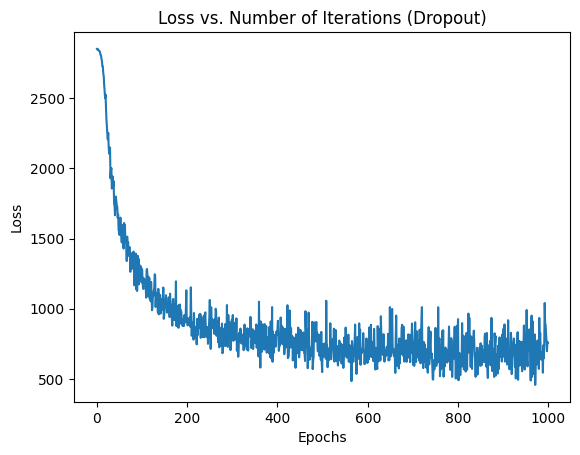

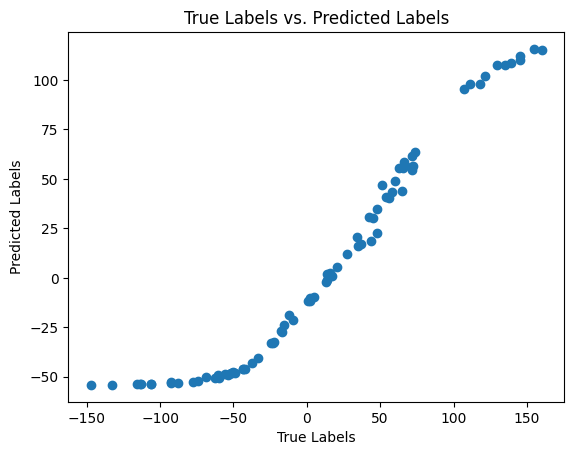

Training with Early Stopping


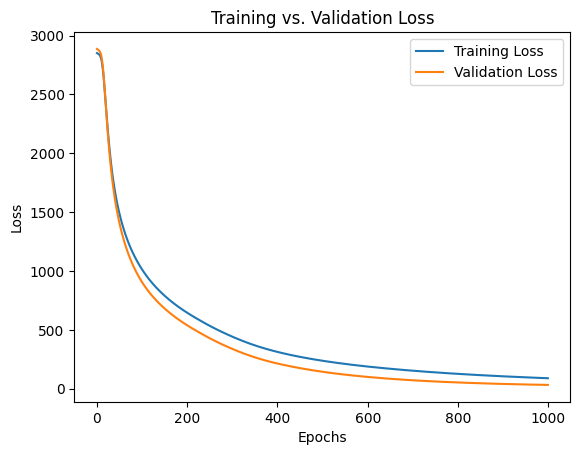

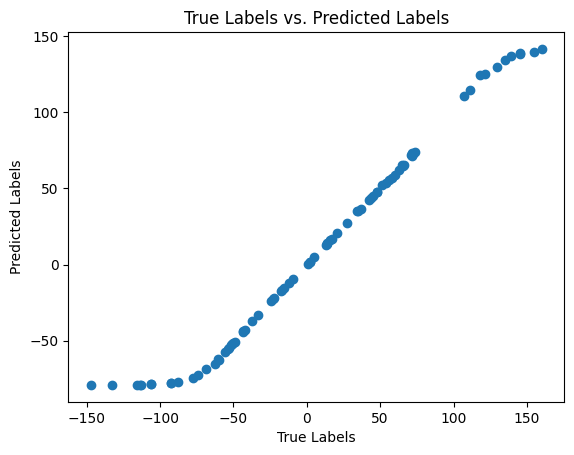

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load the data
X_train = np.loadtxt("X_train.csv")
Y_train = np.loadtxt("Y_train.csv")
X_test = np.loadtxt("X_test.csv")
Y_test = np.loadtxt("Y_test.csv")

# Reshape Y_train if it's 1-dimensional
if Y_train.ndim == 1:
    Y_train = Y_train.reshape(1, -1)

# Transpose the input data
X_train = X_train.T
X_test = X_test.T

# Split the training data into training and validation sets
X_train, X_val, Y_train, Y_val = train_test_split(X_train.T, Y_train.T, test_size=0.2, random_state=42)
X_train = X_train.T
X_val = X_val.T
Y_train = Y_train.T
Y_val = Y_val.T

# Initialize parameters
def initialize_parameters(input_size, hidden_size, output_size):
    W1 = np.random.randn(hidden_size, input_size) * 0.01
    b1 = np.zeros((hidden_size, 1))
    W2 = np.random.randn(output_size, hidden_size) * 0.01
    b2 = np.zeros((output_size, 1))
    return W1, b1, W2, b2

# Activation functions and their derivatives
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    s = sigmoid(z)
    return s * (1 - s)

def relu(z):
    return np.maximum(0, z)

def relu_derivative(z):
    return np.where(z > 0, 1, 0)

# Forward pass with dropout
def forward_pass_with_dropout(X, W1, b1, W2, b2, dropout_rate):
    Z1 = np.dot(W1, X) + b1
    A1 = sigmoid(Z1)
    D1 = np.random.rand(A1.shape[0], A1.shape[1]) < dropout_rate
    A1 *= D1  # Apply dropout
    A1 /= dropout_rate  # Scale the values
    Z2 = np.dot(W2, A1) + b2
    A2 = Z2  # For regression, the output layer is linear
    return Z1, A1, D1, Z2, A2

# Compute loss (Mean Square Error)
def compute_loss(A2, Y):
    m = Y.shape[1]
    loss = np.sum((A2 - Y) ** 2) / (2 * m)
    return loss

# Backward pass with dropout
def backward_pass_with_dropout(X, Y, Z1, A1, D1, Z2, A2, W1, W2, dropout_rate):
    m = X.shape[1]
    dZ2 = A2 - Y
    dW2 = np.dot(dZ2, A1.T) / m
    db2 = np.sum(dZ2, axis=1, keepdims=True) / m
    dA1 = np.dot(W2.T, dZ2)
    dA1 *= D1  # Apply dropout mask
    dA1 /= dropout_rate  # Scale the values
    dZ1 = dA1 * sigmoid_derivative(Z1)
    dW1 = np.dot(dZ1, X.T) / m
    db1 = np.sum(dZ1, axis=1, keepdims=True) / m
    return dW1, db1, dW2, db2

# Update parameters
def update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate):
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    return W1, b1, W2, b2

# Training the neural network with dropout
def train_neural_network_with_dropout(X_train, Y_train, input_size, hidden_size, output_size, learning_rate, epochs, dropout_rate):
    W1, b1, W2, b2 = initialize_parameters(input_size, hidden_size, output_size)
    loss_history = []
    for epoch in range(epochs):
        Z1, A1, D1, Z2, A2 = forward_pass_with_dropout(X_train, W1, b1, W2, b2, dropout_rate)
        loss = compute_loss(A2, Y_train)
        loss_history.append(loss)
        dW1, db1, dW2, db2 = backward_pass_with_dropout(X_train, Y_train, Z1, A1, D1, Z2, A2, W1, W2, dropout_rate)
        W1, b1, W2, b2 = update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)
        if epoch % 100 == 0:
            print(f"Epoch {epoch}, Loss: {loss:.4f}")
    return W1, b1, W2, b2, loss_history

# Training the neural network with early stopping
def train_neural_network_with_early_stopping(X_train, Y_train, X_val, Y_val, input_size, hidden_size, output_size, learning_rate, epochs, patience):
    W1, b1, W2, b2 = initialize_parameters(input_size, hidden_size, output_size)
    best_loss = float('inf')
    patience_counter = 0
    loss_history = []
    val_loss_history = []

    for epoch in range(epochs):
        Z1, A1, Z2, A2 = forward_pass(X_train, W1, b1, W2, b2)
        loss = compute_loss(A2, Y_train)
        loss_history.append(loss)

        Z1_val, A1_val, Z2_val, A2_val = forward_pass(X_val, W1, b1, W2, b2)
        val_loss = compute_loss(A2_val, Y_val)
        val_loss_history.append(val_loss)

        if val_loss < best_loss:
            best_loss = val_loss
            patience_counter = 0
        else:
            patience_counter += 1

        if patience_counter >= patience:
            print(f"Early stopping at epoch {epoch}")
            break

        dW1, db1, dW2, db2 = backward_pass(X_train, Y_train, Z1, A1, Z2, A2, W1, W2)
        W1, b1, W2, b2 = update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)

    return W1, b1, W2, b2, loss_history, val_loss_history

# Plotting functions
def plot_predictions(X, Y, W1, b1, W2, b2):
    _, _, _, A2 = forward_pass(X, W1, b1, W2, b2)
    plt.scatter(Y.flatten(), A2.flatten())
    plt.xlabel('True Labels')
    plt.ylabel('Predicted Labels')
    plt.title('True Labels vs. Predicted Labels')
    plt.show()

# Example usage
input_size = X_train.shape[0]
hidden_size = 10  # Choose the number of neurons in the hidden layer
output_size = Y_train.shape[0]
learning_rate = 0.01
epochs = 1000
dropout_rate = 0.5  # Choose the dropout rate
patience = 50  # Choose the patience for early stopping

# Training with dropout
print("Training with Dropout")
W1, b1, W2, b2, loss_history = train_neural_network_with_dropout(X_train, Y_train, input_size, hidden_size, output_size, learning_rate, epochs, dropout_rate)
plt.plot(loss_history)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs. Number of Iterations (Dropout)')
plt.show()
plot_predictions(X_train, Y_train, W1, b1, W2, b2)

# Training with early stopping
print("Training with Early Stopping")
W1, b1, W2, b2, loss_history, val_loss_history = train_neural_network_with_early_stopping(X_train, Y_train, X_val, Y_val, input_size, hidden_size, output_size, learning_rate, epochs, patience)
plt.plot(loss_history, label='Training Loss')
plt.plot(val_loss_history, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs. Validation Loss')
plt.legend()
plt.show()
plot_predictions(X_train, Y_train, W1, b1, W2, b2)
